In [11]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

In [12]:
can = pd.read_csv("C:/Users/user/Desktop/Sneha's Program/ML Datasets/Cancer.csv")
can.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [13]:
can.info

<bound method DataFrame.info of      id diagnosis_result  radius  texture  perimeter  area  smoothness  \
0     1                M      23       12        151   954       0.143   
1     2                B       9       13        133  1326       0.143   
2     3                M      21       27        130  1203       0.125   
3     4                M      14       16         78   386       0.070   
4     5                M       9       19        135  1297       0.141   
..  ...              ...     ...      ...        ...   ...         ...   
95   96                M      23       16        132  1264       0.091   
96   97                B      22       14         78   451       0.105   
97   98                B      19       27         62   295       0.102   
98   99                B      21       24         74   413       0.090   
99  100                M      16       27         94   643       0.098   

    compactness  symmetry  fractal_dimension  
0         0.278     0.242       

In [14]:
can.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [15]:
can.isnull().sum()

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [17]:
can.value_counts('diagnosis_result')

diagnosis_result
M    62
B    38
dtype: int64

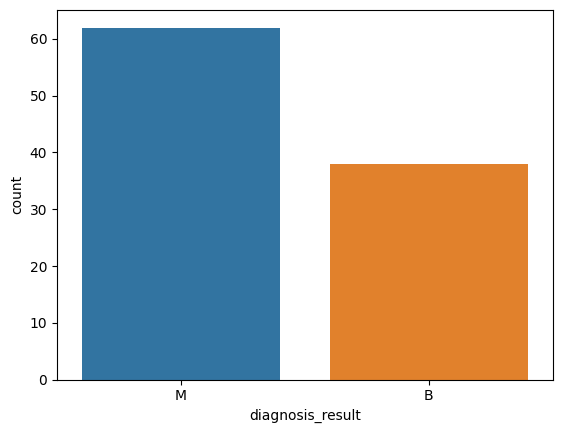

In [24]:
sb.countplot(x='diagnosis_result', data = can)
plt.show()

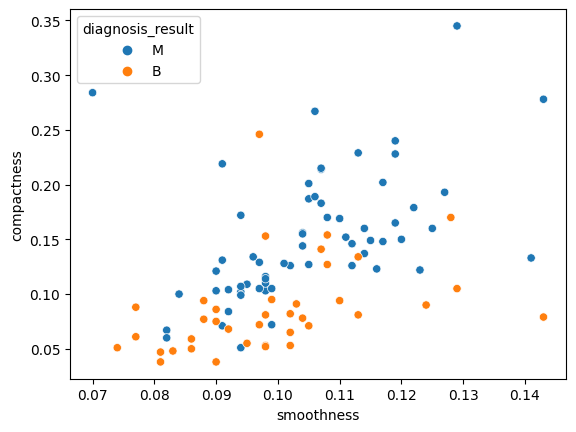

In [37]:
sb.scatterplot(x='smoothness', y= 'compactness',  data = can, hue = 'diagnosis_result')
plt.show()

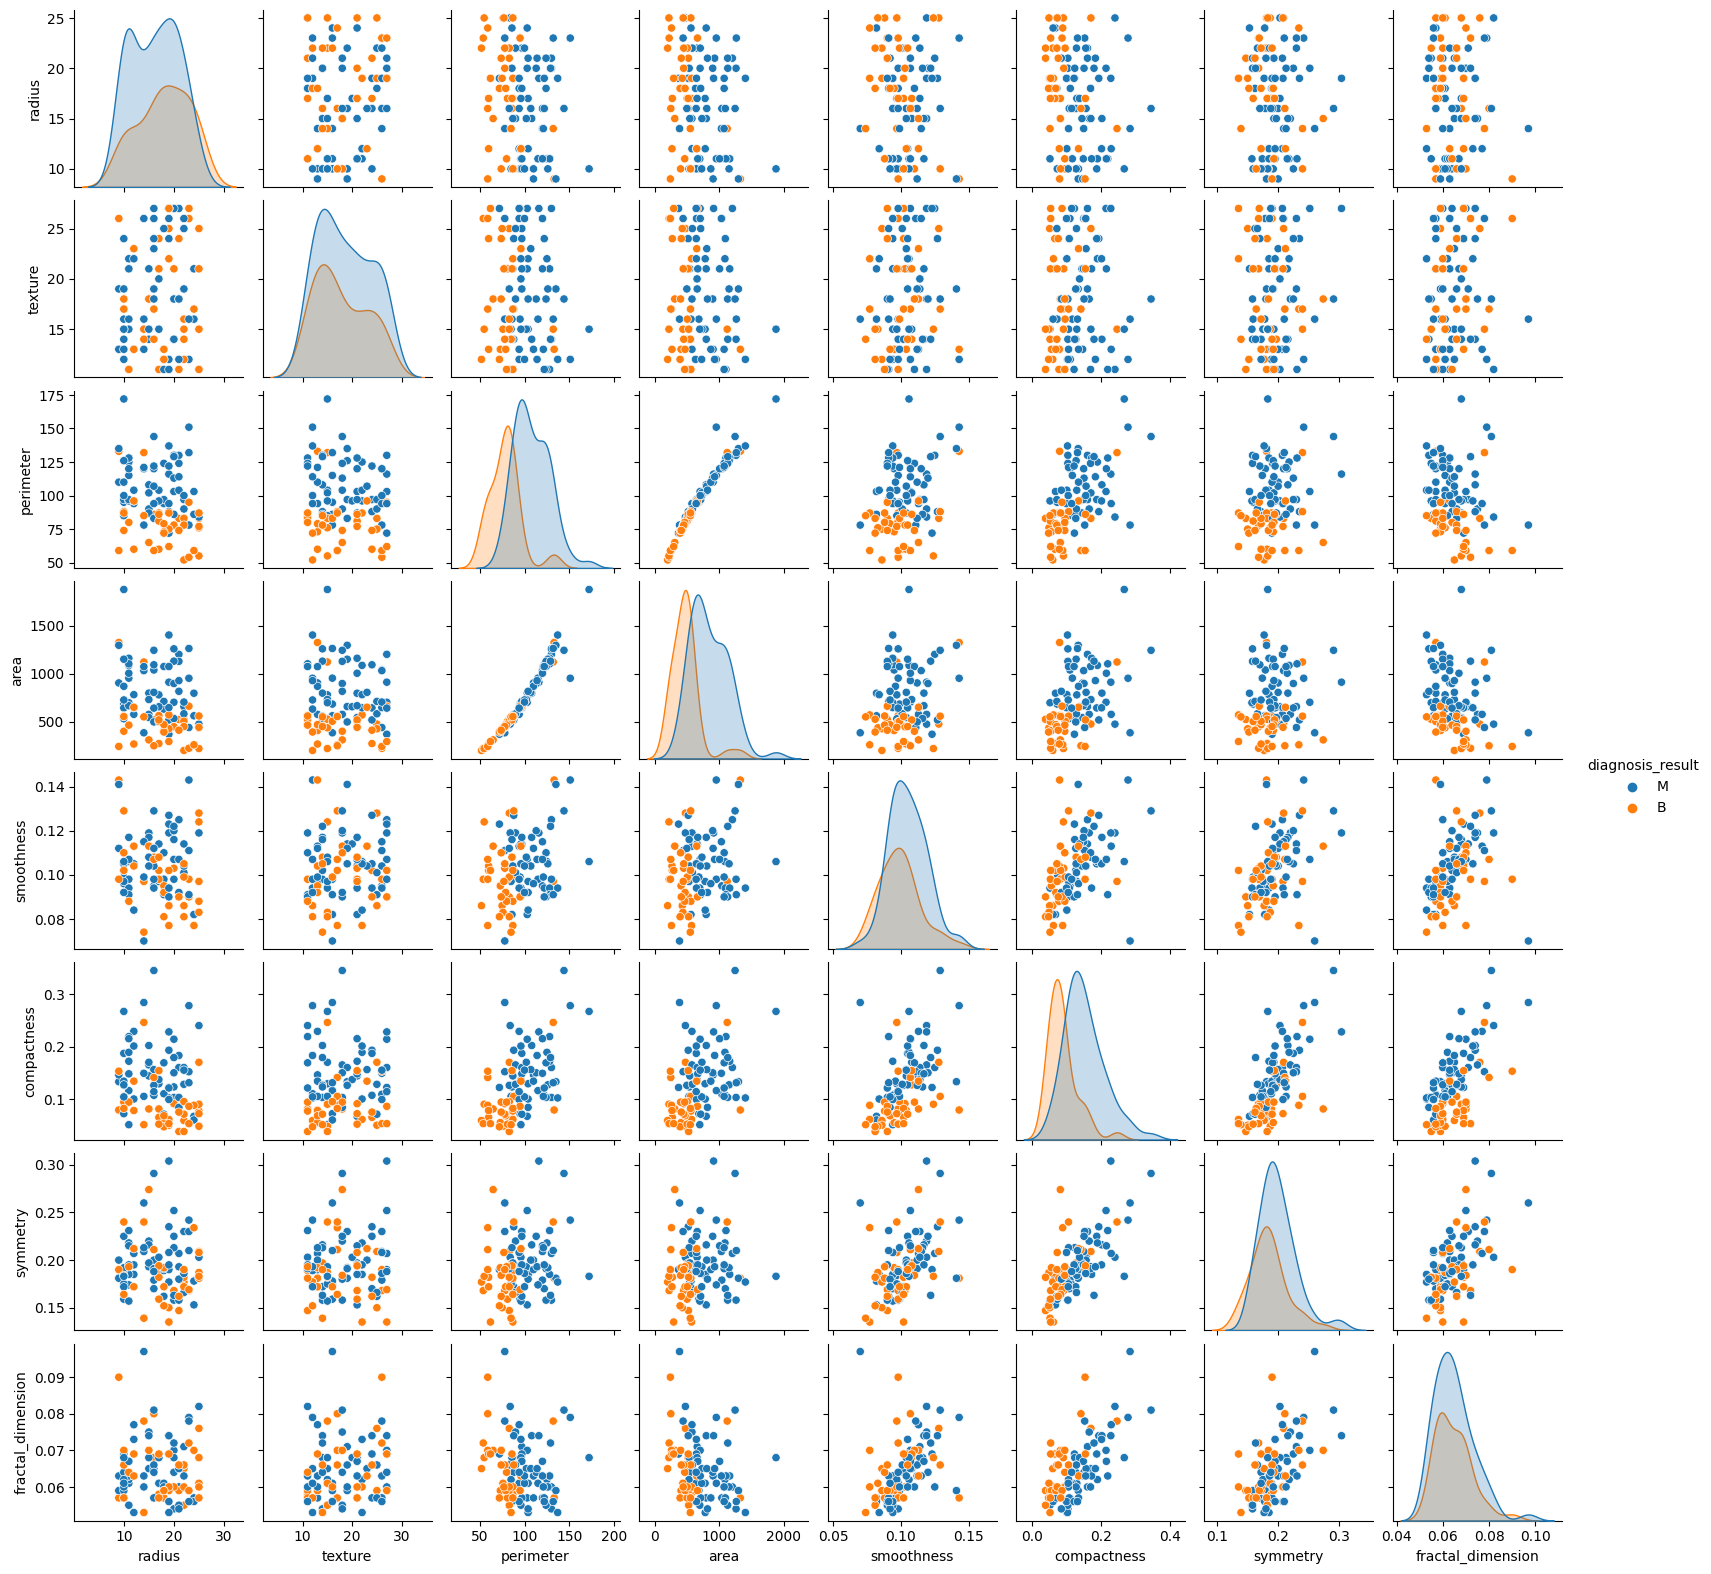

In [36]:
sb.pairplot(can.drop(['id'], axis=1), hue = 'diagnosis_result', height = 2)
plt.show()

(array([31., 33., 22.,  9.,  4.,  1.]),
 array([0.038     , 0.08916667, 0.14033333, 0.1915    , 0.24266667,
        0.29383333, 0.345     ]),
 <BarContainer object of 6 artists>)

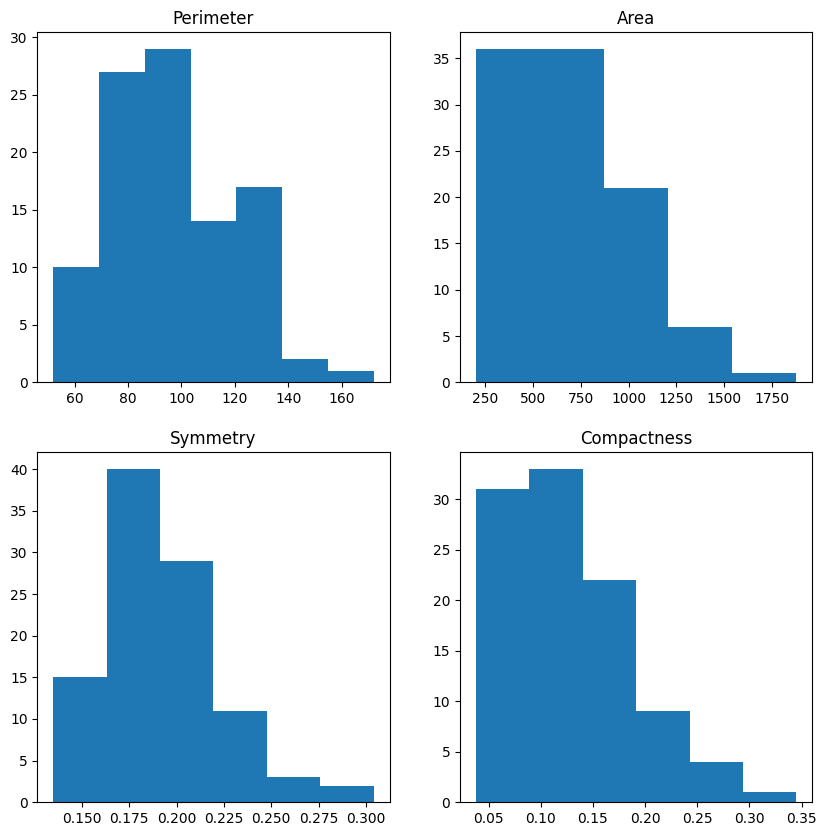

In [40]:
#HISTOGRAM

fig, axes = plt.subplots(2,2,figsize=(10,10))

axes[0,0].set_title("Perimeter")
axes[0,0].hist(can['perimeter'],bins = 7)

axes[0,1].set_title("Area")
axes[0,1].hist(can['area'],bins = 5)

axes[1,0].set_title("Symmetry")
axes[1,0].hist(can['symmetry'],bins = 6)

axes[1,1].set_title("Compactness")
axes[1,1].hist(can['compactness'],bins = 6)

C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*

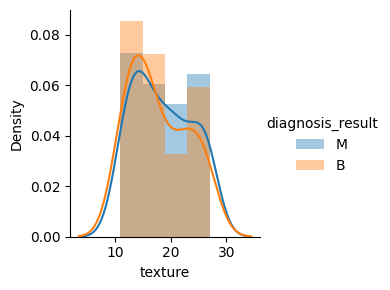

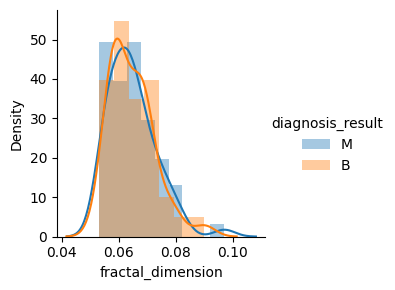

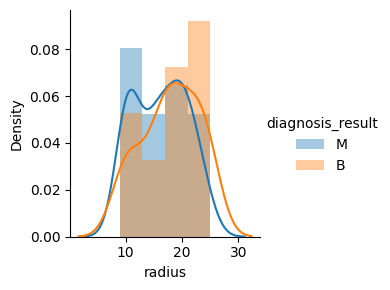

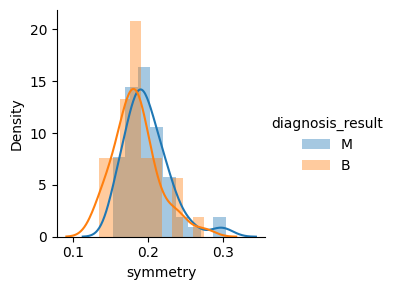

In [43]:

plot = sb.FacetGrid(can, hue ='diagnosis_result')
plot.map(sb.distplot,'texture').add_legend()

plot = sb.FacetGrid(can, hue ='diagnosis_result')
plot.map(sb.distplot,'fractal_dimension').add_legend()

plot = sb.FacetGrid(can, hue ='diagnosis_result')
plot.map(sb.distplot,'radius').add_legend()

plot = sb.FacetGrid(can, hue ='diagnosis_result')
plot.map(sb.distplot,'symmetry').add_legend()

In [45]:
hm=can.corr(method='pearson')
print(hm)

                         id    radius   texture  perimeter      area  \
id                 1.000000  0.047276  0.052263  -0.215953 -0.174354   
radius             0.047276  1.000000  0.100245  -0.238216 -0.250934   
texture            0.052263  0.100245  1.000000  -0.113453 -0.113725   
perimeter         -0.215953 -0.238216 -0.113453   1.000000  0.976648   
area              -0.174354 -0.250934 -0.113725   0.976648  1.000000   
smoothness        -0.258328 -0.127121  0.102321   0.269442  0.208438   
compactness       -0.277554 -0.191490  0.032446   0.527542  0.424950   
symmetry          -0.222334 -0.039707  0.077912   0.195539  0.110435   
fractal_dimension -0.164946 -0.029120  0.139157  -0.195434 -0.274344   

                   smoothness  compactness  symmetry  fractal_dimension  
id                  -0.258328    -0.277554 -0.222334          -0.164946  
radius              -0.127121    -0.191490 -0.039707          -0.029120  
texture              0.102321     0.032446  0.077912     

C:\Users\user\AppData\Local\Temp\ipykernel_3988\1649125335.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hm=can.corr(method='pearson')


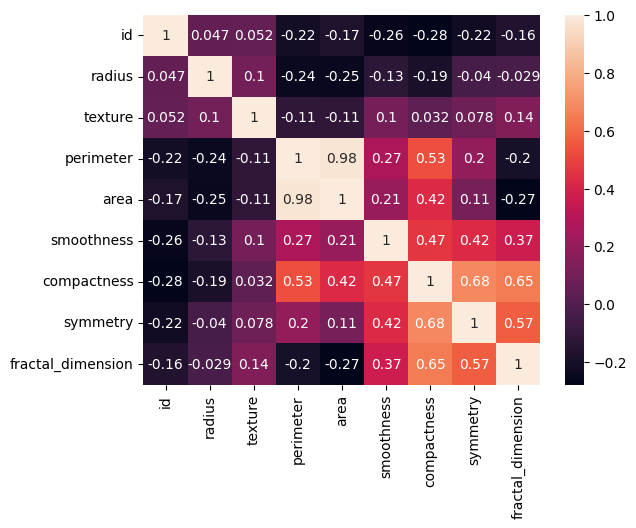

In [46]:
sb.heatmap(hm, annot = True);
plt.show();

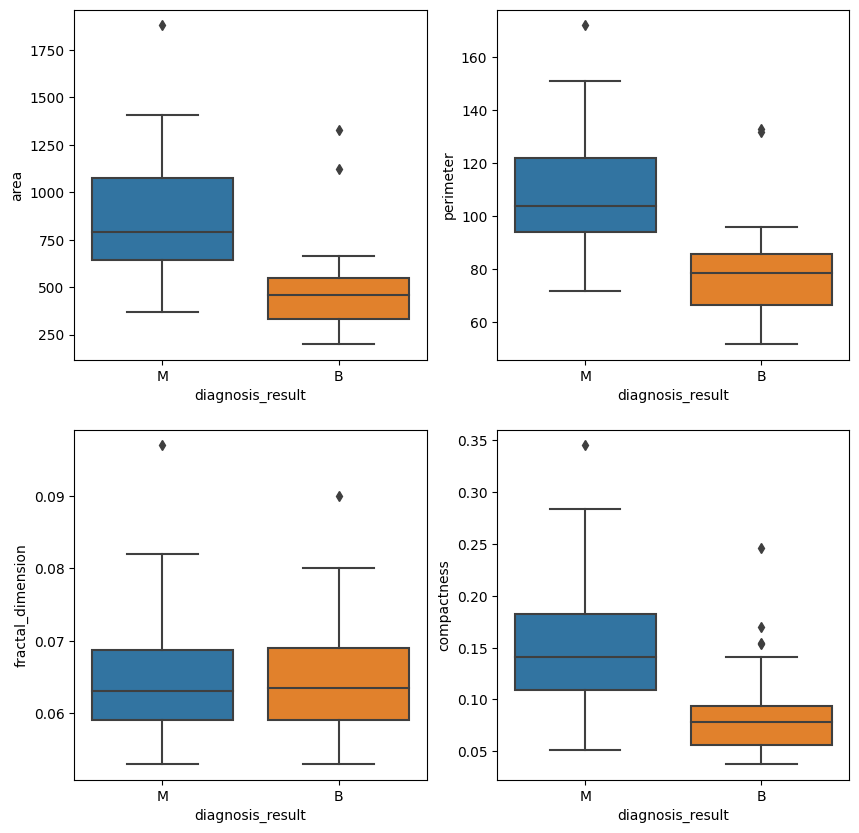

In [48]:
def graph(y):
    sb.boxplot(x='diagnosis_result', y=y, data=can)
    
plt.figure (figsize=(10,10))

plt.subplot(221)
graph('area')

plt.subplot(222)
graph('perimeter')

plt.subplot(223)
graph('fractal_dimension')

plt.subplot(224)
graph('compactness')

plt.show()

# KNN - Classification

Below is the code for implementation of KNN Classifier model.

.

In [49]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [52]:
can2 = can
can2.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [53]:
can2.shape

(100, 10)

In [58]:
can2.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [60]:
x = can.value_counts('diagnosis_result')

([<matplotlib.patches.Wedge at 0x2e2854f0>,
 [Text(-0.4049370232742901, 1.0227541284110062, ''),
  Text(0.40493702327429043, -1.0227541284110062, '')])

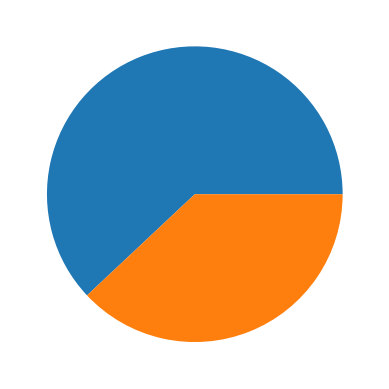

In [61]:
plt.pie(x)